In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
import point_to_box.utils as utils
import point_to_box.data as data
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Point-to-box

> A set of models, tools, and tutorials for the automation of annotating individual objects in images.

This file will become your README and also the index of your documentation.

## Install

`pip install point_to_box`

## How to use

### The data module:

The data module can transform COCO object-detection style data and annotations into point-to-box style data and annotations using the `point_to_box.data` module.

In [ ]:
SRC = Path('../../data/val2017/')
DST = Path('../../converted_data')
ANNOS = 'instances_val2017.json'

In [ ]:
dataset = data.ConversionDataset(data_path = SRC,
                              anno_fname = ANNOS,
                              dst_path = DST)

loading annotations into memory...
Done (t=0.79s)
creating index...
index created!


In [ ]:
#hide
dataset.coco.getImgIds()

[397133,
 37777,
 252219,
 87038,
 174482,
 403385,
 6818,
 480985,
 458054,
 331352,
 296649,
 386912,
 502136,
 491497,
 184791,
 348881,
 289393,
 522713,
 181666,
 17627,
 143931,
 303818,
 463730,
 460347,
 322864,
 226111,
 153299,
 308394,
 456496,
 58636,
 41888,
 184321,
 565778,
 297343,
 336587,
 122745,
 219578,
 555705,
 443303,
 500663,
 418281,
 25560,
 403817,
 85329,
 329323,
 239274,
 286994,
 511321,
 314294,
 233771,
 475779,
 301867,
 312421,
 185250,
 356427,
 572517,
 270244,
 516316,
 125211,
 562121,
 360661,
 16228,
 382088,
 266409,
 430961,
 80671,
 577539,
 104612,
 476258,
 448365,
 35197,
 349860,
 180135,
 486438,
 400573,
 109798,
 370677,
 238866,
 369370,
 502737,
 515579,
 515445,
 173383,
 438862,
 180560,
 347693,
 39956,
 321214,
 474028,
 66523,
 355257,
 142092,
 63154,
 199551,
 239347,
 514508,
 473237,
 228144,
 206027,
 78915,
 551215,
 544519,
 96493,
 23899,
 340175,
 578500,
 366141,
 57597,
 559842,
 434230,
 428454,
 399462,
 261061,
 1

In [ ]:
img, bboxs, cntrs, cats = dataset.load_img(252219)
img_w_boxes=utils.draw_rect(np.array(img), np.reshape(np.array(bboxs), (-1, 4)))

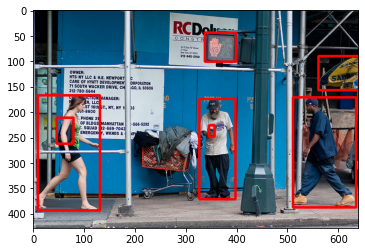

In [ ]:
plt.imshow(img_w_boxes)
plt.show()